In [83]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr,chisquare,spearmanr
import scipy
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from pprint import pprint
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [84]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [85]:
df = pd.read_csv('Case_study_CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [86]:
df.shape

(205, 26)

In [87]:
df['carmaker'] = 0
# hãng xe là kí tự đầu tiên được ngăn cách bởi dấu cách của tên xe
for i in range(len(df['CarName'])):
    df['carmaker'][i] = df['CarName'][i].split()[0].lower()
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_25872\2345002652.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['carmaker'][i] = df['CarName'][i].split()[0].lower()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carmaker
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [88]:
df['doornumber'].replace({'two':2,'three':3,'four':4,'five':5,'six':6},inplace=True)
df['cylindernumber'].replace({'twelve':12,'three':3,'four':4,'five':5,'six':6,'eight':12,'two':2},inplace=True)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carmaker
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

In [90]:
df.carmaker.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [91]:
#sua loi cac hang xe
for i in range(len(df.carmaker)):
    if df.carmaker.iloc[i] == 'maxda' : df.carmaker.iloc[i] = 'mazda'
    elif df.carmaker.iloc[i] == 'vokswagen' or df.carmaker.iloc[i] == 'vw': df.carmaker.iloc[i] = 'volkswagen'
    elif df.carmaker.iloc[i] == 'toyouta' : df.carmaker.iloc[i] = 'toyota'
    elif df.carmaker.iloc[i] == 'porcshce' : df.carmaker.iloc[i] = 'porsche'
df.carmaker.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

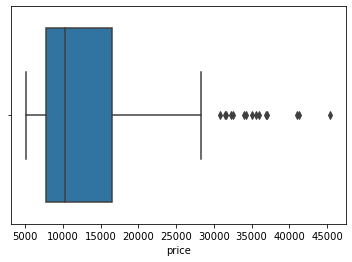

In [92]:
sns.boxplot(df['price'])

In [93]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1
print((q1 - 1.5 * iqr))
print((q3 + 1.5 * iqr))

-5284.5
29575.5


In [94]:
df = df[df.price < 29575.5]
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carmaker
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,4,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,volvo 144ea,gas,turbo,4,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,volvo 244dl,gas,std,4,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,volvo 246,diesel,turbo,4,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [95]:
df.describe()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,105.463158,0.836842,3.136842,98.276316,172.811579,65.635263,53.755263,2480.031579,4.173684,118.415789,3.303579,3.251263,10.183789,97.231579,5124.473684,25.947368,31.521053,11509.400879
std,59.925052,1.230009,0.993210,5.280965,11.375806,1.844961,2.425645,445.890595,0.671681,26.854315,0.261671,0.304045,4.015859,30.225940,471.593591,6.212921,6.476419,4968.444389
min,1.000000,-2.000000,2.000000,86.600000,141.100000,60.300000,48.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,16.000000,20.000000,5118.000000
25%,54.250000,0.000000,2.000000,94.500000,166.300000,64.000000,52.000000,2128.000000,4.000000,97.000000,3.130000,3.127500,8.700000,70.000000,4800.000000,21.000000,26.000000,7701.250000
50%,106.500000,1.000000,4.000000,96.500000,172.500000,65.400000,54.100000,2395.000000,4.000000,110.000000,3.270000,3.290000,9.000000,92.000000,5200.000000,25.000000,31.000000,9959.500000
75%,157.750000,2.000000,4.000000,100.400000,178.350000,66.500000,55.500000,2823.750000,4.000000,136.000000,3.540000,3.410000,9.400000,114.000000,5500.000000,31.000000,37.000000,15197.500000
max,205.000000,3.000000,4.000000,114.200000,198.900000,71.400000,59.800000,3750.000000,6.000000,183.000000,3.940000,3.900000,23.000000,200.000000,6600.000000,49.000000,54.000000,28248.000000


### carmaker: Hang xe

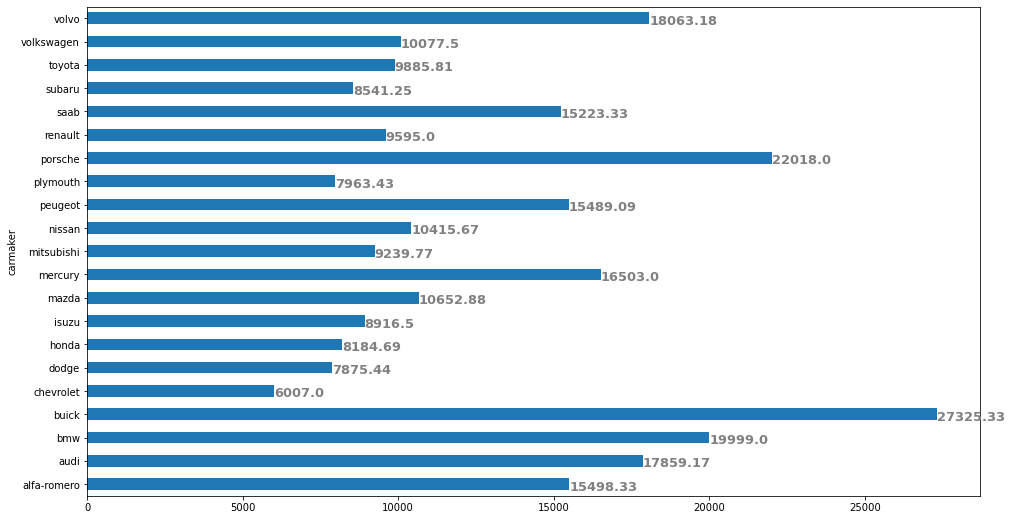

In [96]:
# biểu đồ hãng xe với trung binh price
fig, ax = plt.subplots(figsize=(16, 9))
df.groupby('carmaker')['price'].mean().plot.barh()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y(),
             str(round((i.get_width()), 2)),
             fontsize = 13, fontweight ='bold',
             color ='grey')

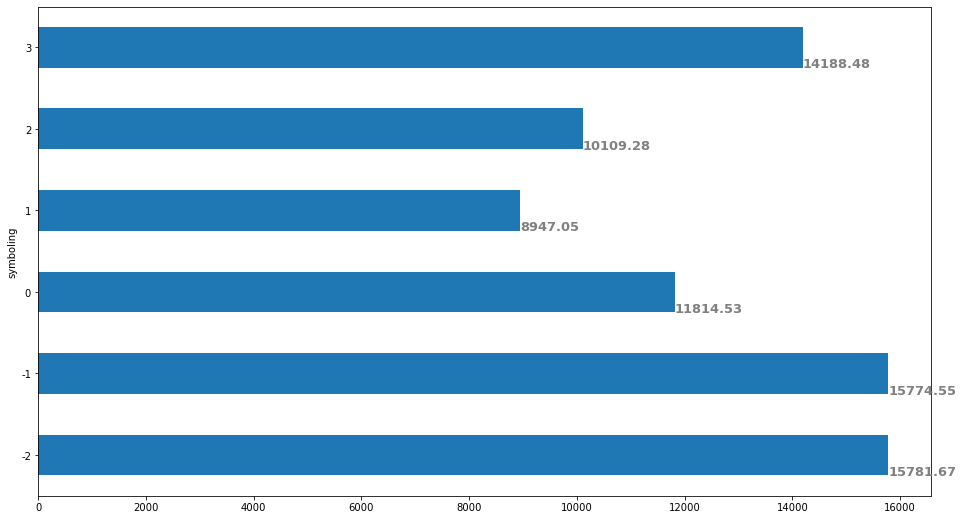

In [97]:
# mức độ an toàn với pcrice
fig, ax = plt.subplots(figsize=(16, 9))
df.groupby('symboling')['price'].mean().plot.barh()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y(),
             str(round((i.get_width()), 2)),
             fontsize = 13, fontweight ='bold',
             color ='grey')


<AxesSubplot:ylabel='fueltype'>

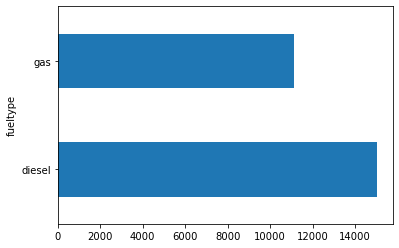

In [98]:
# loại nhiên liệu (dầu hoặc xăng với price)
df.groupby('fueltype')['price'].mean().plot.barh()

<BarContainer object of 190 artists>

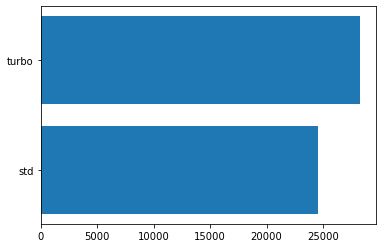

In [99]:
# loại hút với price
plt.barh(df['aspiration'],df['price'])

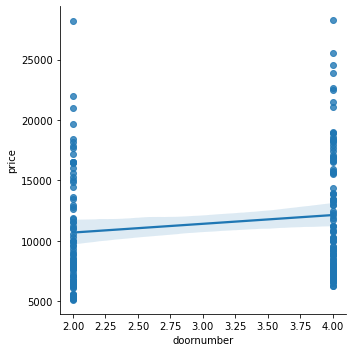

In [100]:
# số lượng cửa với price
sns.lmplot(x='doornumber',y='price',data=df)

<BarContainer object of 190 artists>

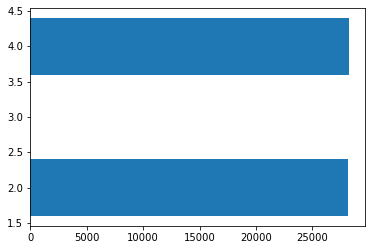

In [101]:
plt.barh(df['doornumber'],df['price'])

In [102]:
stats.pearsonr(df['doornumber'],df['price'])

(0.14460405219841352, 0.04653030985940012)

<AxesSubplot:ylabel='carbody'>

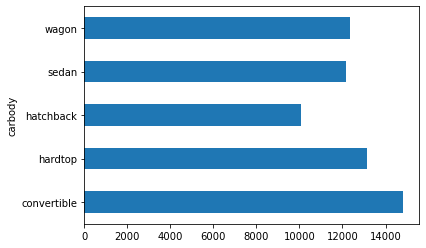

In [103]:
# loại thân xe với price
df.groupby('carbody')['price'].mean().plot.barh()

<BarContainer object of 190 artists>

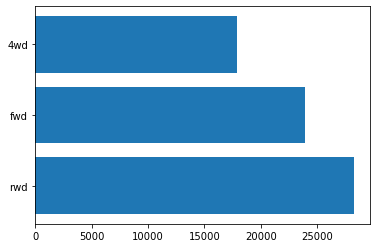

In [104]:
# loại bắnh xe với price
plt.barh(df['drivewheel'],df['price'])

<BarContainer object of 190 artists>

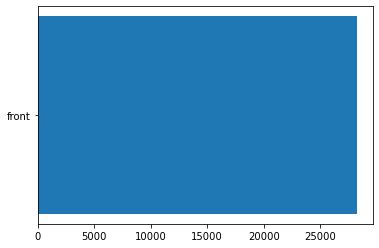

In [105]:
# vị trí động cơ với price
plt.barh(df['enginelocation'],df['price'])

In [106]:
df.drop('enginelocation', axis=1, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_25872\2918161995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('enginelocation', axis=1, inplace=True)


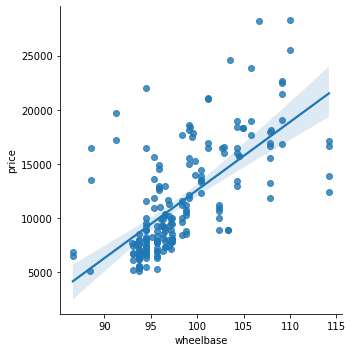

In [107]:
# chiều dài cơ sở
sns.lmplot(x='wheelbase',y='price',data=df)

In [108]:
stats.pearsonr(df['wheelbase'],df['price'])

(0.6677117963065448, 6.897232697213205e-26)

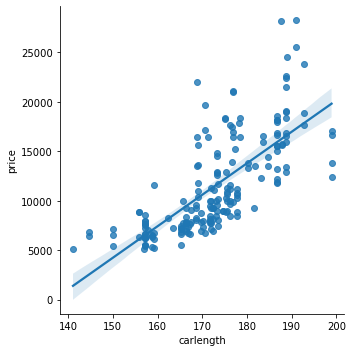

In [109]:
#chiều dài xe
sns.lmplot(x='carlength',y='price',data=df)

In [110]:
stats.pearsonr(df['carlength'],df['price'])

(0.7297337652574776, 7.204668945091591e-33)

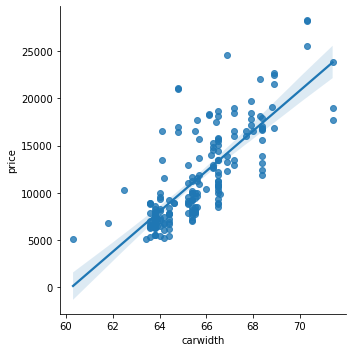

In [111]:
# chiều rộng xe
sns.lmplot(x='carwidth',y='price',data=df)

In [112]:
stats.pearsonr(df['carwidth'],df['price'])

(0.7918902323560487, 3.9358012690776275e-42)

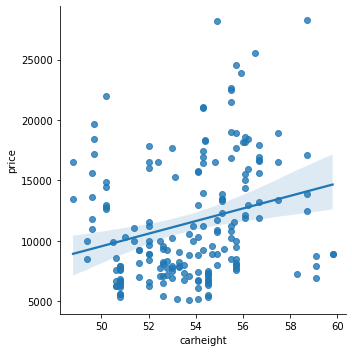

In [113]:
#chiều cao xe
sns.lmplot(x='carheight',y='price',data=df)

In [114]:
stats.pearsonr(df['carheight'],df['price'])

(0.25456448690272854, 0.00039358875301819023)

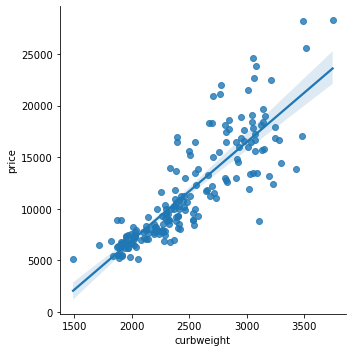

In [115]:
# Trọng lượng của xe khi không có người hoặc hành lý
sns.lmplot(x='curbweight',y='price',data=df)

In [116]:
stats.pearsonr(df['curbweight'],df['price'])

(0.8539514247874567, 3.133280696258635e-55)

<BarContainer object of 190 artists>

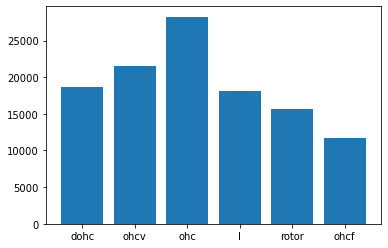

In [117]:
#Loại động cơ
plt.bar(df['enginetype'],df['price'])

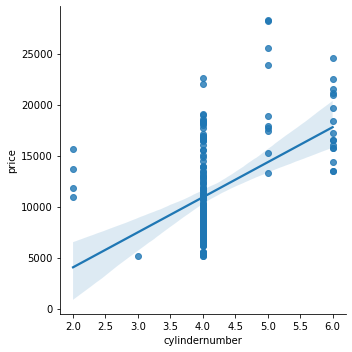

In [118]:
# Số lượng xi lanh đặt trong xe
sns.lmplot(x='cylindernumber',y='price',data=df)

In [119]:
stats.pearsonr(df['cylindernumber'],df['price'])

(0.4641964362842276, 1.5222496129265314e-11)

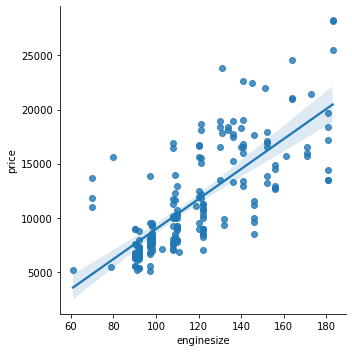

In [120]:
# Kích thước động cơ
sns.lmplot(x='enginesize',y='price',data=df)

In [121]:
stats.pearsonr(df['enginesize'],df['price'])

(0.7498829028178291, 1.431697564661105e-35)

<BarContainer object of 190 artists>

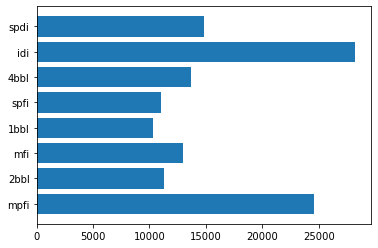

In [122]:
# Hệ thống nhiên liệu của xe ô tô
plt.barh(df['fuelsystem'],df['price'])

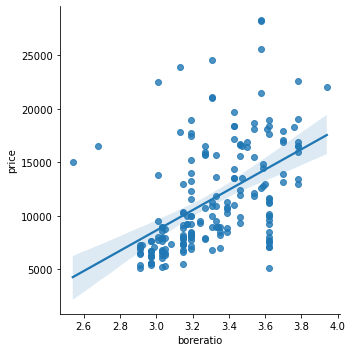

In [123]:
# Tỉ số hành trình
sns.lmplot(x='boreratio',y='price',data=df)

In [124]:
stats.pearsonr(df['boreratio'],df['price'])

(0.4992437508029533, 2.2709501111060972e-13)

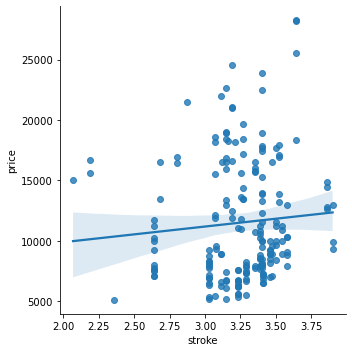

In [125]:
#số kỳ hoăc kích thước bên trong động cơ
sns.lmplot(x='stroke',y='price',data=df)

In [126]:
stats.pearsonr(df['stroke'],df['price'])

(0.0793782060981167, 0.2763075615599032)

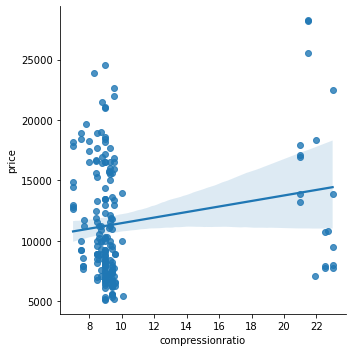

In [127]:
# Tỉ số nén của ôtô
sns.lmplot(x='compressionratio',y='price',data=df)

In [128]:
stats.pearsonr(df['compressionratio'],df['price'])

(0.18500680566470973, 0.010606184849350702)

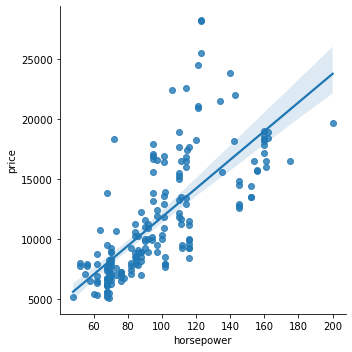

In [129]:
# Mã lực
sns.lmplot(x='horsepower',y='price',data=df)

In [130]:
stats.pearsonr(df['horsepower'],df['price'])

(0.7273936920568058, 1.431075106717961e-32)

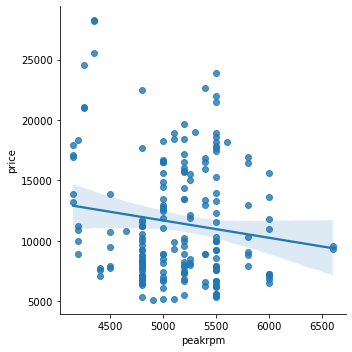

In [131]:
# Tốc độ động cơ cao nhất
sns.lmplot(x='peakrpm',y='price',data=df)

In [132]:
stats.pearsonr(df['peakrpm'],df['price'])

(-0.13618945993531645, 0.06098650255381347)

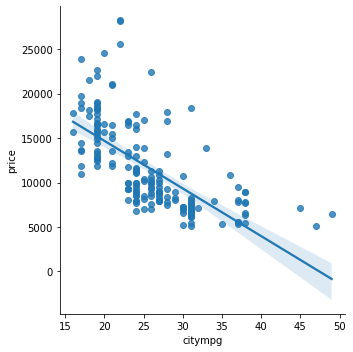

In [133]:
# số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trong thành phố
sns.lmplot(x='citympg',y='price',data=df)

In [134]:
stats.pearsonr(df['citympg'],df['price'])

(-0.6702562037846251, 3.8503318681680853e-26)

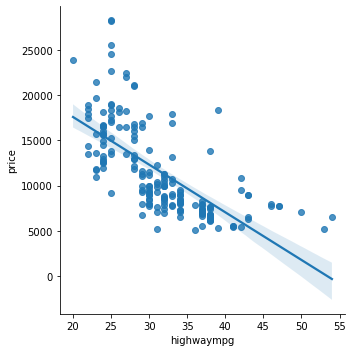

In [135]:
# số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trên đường cao tốc
sns.lmplot(x='highwaympg',y='price',data=df)

In [136]:
stats.pearsonr(df['highwaympg'],df['price'])

(-0.6861572447033237, 8.804086022363852e-28)

<AxesSubplot:>

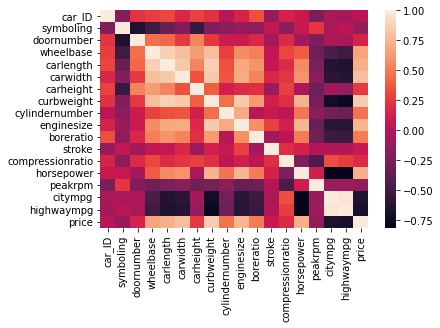

In [137]:
sns.heatmap(df.corr())

In [138]:
df1 = df[['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']]
corr_df1=df1.corr()
corr_df1

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.859280,0.794353,0.633945,0.780903,0.570260,0.512363,0.055781,0.302991,0.377546,-0.304770,-0.455649,-0.511091,0.667712
carlength,0.859280,1.000000,0.832535,0.534056,0.869948,0.686552,0.599479,0.059792,0.191597,0.564379,-0.252795,-0.645277,-0.663684,0.729734
carwidth,0.794353,0.832535,1.000000,0.342674,0.838538,0.698108,0.528538,0.166125,0.229062,0.603085,-0.187687,-0.606134,-0.631884,0.791890
carheight,0.633945,0.534056,0.342674,1.000000,0.388335,0.178920,0.212620,-0.105190,0.275279,-0.039881,-0.310161,-0.080626,-0.133196,0.254564
curbweight,0.780903,0.869948,0.838538,0.388335,1.000000,0.837881,0.627042,0.123491,0.207844,0.734304,-0.264091,-0.724138,-0.760200,0.853951
enginesize,0.570260,0.686552,0.698108,0.178920,0.837881,1.000000,0.579403,0.272543,0.122765,0.757357,-0.331153,-0.609982,-0.625118,0.749883
boreratio,0.512363,0.599479,0.528538,0.212620,0.627042,0.579403,1.000000,-0.077820,0.023580,0.497082,-0.307256,-0.526432,-0.543197,0.499244
stroke,0.055781,0.059792,0.166125,-0.105190,0.123491,0.272543,-0.077820,1.000000,0.205213,0.140763,-0.012708,-0.028100,-0.015464,0.079378
compressionratio,0.302991,0.191597,0.229062,0.275279,0.207844,0.122765,0.023580,0.205213,1.000000,-0.234220,-0.451696,0.332195,0.270075,0.185007
horsepower,0.377546,0.564379,0.603085,-0.039881,0.734304,0.757357,0.497082,0.140763,-0.234220,1.000000,0.115651,-0.813542,-0.802585,0.727394


<AxesSubplot:>

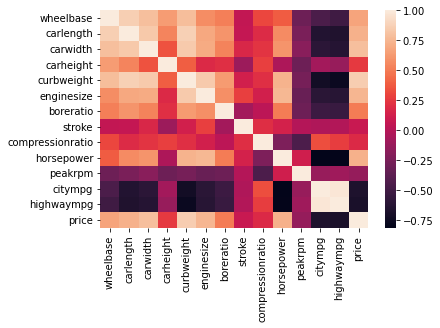

In [139]:
sns.heatmap(corr_df1)

In [140]:
bien_dl = list()
for i in corr_df1.index:
    if i!='price':
        if np.abs(corr_df1['price'][i]) >= 0.7:
            bien_dl.append(i)
bien_dl

['carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower']

In [141]:
# Xây dựng mô hình hồi quy tuyến tính trên các biến được chọn bởi phương pháp feature selection.
bien_dt = ['symboling','enc_carmaker','enc_aspiration','enc_carbody','enc_drivewheel','cylindernumber','carlength']

In [142]:
bien_tq = bien_dl+bien_dt+['price']
bien_tq

['carlength',
 'carwidth',
 'curbweight',
 'enginesize',
 'horsepower',
 'symboling',
 'enc_carmaker',
 'enc_aspiration',
 'enc_carbody',
 'enc_drivewheel',
 'cylindernumber',
 'carlength',
 'price']

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            190 non-null    int64  
 1   symboling         190 non-null    int64  
 2   CarName           190 non-null    object 
 3   fueltype          190 non-null    object 
 4   aspiration        190 non-null    object 
 5   doornumber        190 non-null    int64  
 6   carbody           190 non-null    object 
 7   drivewheel        190 non-null    object 
 8   wheelbase         190 non-null    float64
 9   carlength         190 non-null    float64
 10  carwidth          190 non-null    float64
 11  carheight         190 non-null    float64
 12  curbweight        190 non-null    int64  
 13  enginetype        190 non-null    object 
 14  cylindernumber    190 non-null    int64  
 15  enginesize        190 non-null    int64  
 16  fuelsystem        190 non-null    object 
 1

In [144]:
df['enc_fueltype'] = encoder.fit_transform(df['fueltype'])
df['enc_aspiration'] = encoder.fit_transform(df['aspiration'])
df['enc_carbody'] = encoder.fit_transform(df['carbody'])
df['enc_drivewheel'] = encoder.fit_transform(df['drivewheel'])
df['enc_enginetype'] = encoder.fit_transform(df['enginetype'])
df['enc_fuelsystem'] = encoder.fit_transform(df['fuelsystem'])
df['enc_carmaker'] = encoder.fit_transform(df['carmaker'])
df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_25872\1065717055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['enc_fueltype'] = encoder.fit_transform(df['fueltype'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_25872\1065717055.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['enc_aspiration'] = encoder.fit_transform(df['aspiration'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_25872\1065717055.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,...,highwaympg,price,carmaker,enc_fueltype,enc_aspiration,enc_carbody,enc_drivewheel,enc_enginetype,enc_fuelsystem,enc_carmaker
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,88.6,168.8,...,27,13495.0,alfa-romero,1,0,0,2,0,5,0
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,88.6,168.8,...,27,16500.0,alfa-romero,1,0,0,2,0,5,0
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,94.5,171.2,...,26,16500.0,alfa-romero,1,0,2,2,4,5,0
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,99.8,176.6,...,30,13950.0,audi,1,0,3,1,2,5,1
4,5,2,audi 100ls,gas,std,4,sedan,4wd,99.4,176.6,...,22,17450.0,audi,1,0,3,0,2,5,1


In [145]:
df3= df[bien_tq]
df3.reset_index(inplace=True)
df3.head()

,index,carlength,carwidth,curbweight,enginesize,horsepower,symboling,enc_carmaker,enc_aspiration,enc_carbody,enc_drivewheel,cylindernumber,carlength,price
0,0,168.8,64.1,2548,130,111,3,0,0,0,2,4,168.8,13495.0
1,1,168.8,64.1,2548,130,111,3,0,0,0,2,4,168.8,16500.0
2,2,171.2,65.5,2823,152,154,1,0,0,2,2,6,171.2,16500.0
3,3,176.6,66.2,2337,109,102,2,1,0,3,1,4,176.6,13950.0
4,4,176.6,66.4,2824,136,115,2,1,0,3,0,5,176.6,17450.0


In [146]:
df4 = df3[['horsepower','enginesize','carlength','curbweight','carwidth','price']]
s_scaler = StandardScaler()
df4_s = s_scaler.fit_transform(df4)
col_names = list(df4.columns)
df4_s = pd.DataFrame(df4_s, columns=col_names)
df4_s

,horsepower,enginesize,carlength,carlength,curbweight,carwidth,price
0,0.456720,0.432512,-0.353573,-0.353573,0.152836,-0.834337,0.400698
1,0.456720,0.432512,-0.353573,-0.353573,0.152836,-0.834337,1.007113
2,1.883098,1.253912,-0.142042,-0.142042,0.771208,-0.073509,1.007113
3,0.158176,-0.351551,0.333904,0.333904,-0.321625,0.306906,0.492518
4,0.589406,0.656530,0.333904,0.333904,0.773457,0.415595,1.198825
...,...,...,...,...,...,...,...
185,0.556235,0.843212,1.409189,1.409189,1.061281,1.774217,1.076735
186,2.082127,0.843212,1.409189,1.409189,1.279398,1.719872,1.520699
187,1.219666,2.037975,1.409189,1.409189,1.196199,1.774217,2.013096
188,0.290862,0.992557,1.409189,1.409189,1.657168,1.774217,2.211871


In [147]:
final = pd.concat([df4_s.iloc[:,:5],df3.iloc[:,5:11],df4_s.iloc[:,5:]],axis=1)
final

,horsepower,enginesize,carlength,carlength,curbweight,horsepower,symboling,enc_carmaker,enc_aspiration,enc_carbody,enc_drivewheel,carwidth,price
0,0.456720,0.432512,-0.353573,-0.353573,0.152836,111,3,0,0,0,2,-0.834337,0.400698
1,0.456720,0.432512,-0.353573,-0.353573,0.152836,111,3,0,0,0,2,-0.834337,1.007113
2,1.883098,1.253912,-0.142042,-0.142042,0.771208,154,1,0,0,2,2,-0.073509,1.007113
3,0.158176,-0.351551,0.333904,0.333904,-0.321625,102,2,1,0,3,1,0.306906,0.492518
4,0.589406,0.656530,0.333904,0.333904,0.773457,115,2,1,0,3,0,0.415595,1.198825
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,0.556235,0.843212,1.409189,1.409189,1.061281,114,-1,20,0,3,2,1.774217,1.076735
186,2.082127,0.843212,1.409189,1.409189,1.279398,160,-1,20,1,3,2,1.719872,1.520699
187,1.219666,2.037975,1.409189,1.409189,1.196199,134,-1,20,0,3,2,1.774217,2.013096
188,0.290862,0.992557,1.409189,1.409189,1.657168,106,-1,20,1,3,2,1.774217,2.211871


In [148]:
# mô hình hồi quy tuyến tính 8:2
y = final.price.values.reshape(-1,1)
X = final.iloc[:,0:11].values.reshape(-1,11)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [149]:
bien_tq.remove("price")

In [157]:
temp = bien_tq

In [158]:
temp

['carlength',
 'carwidth',
 'curbweight',
 'enginesize',
 'horsepower',
 'symboling',
 'enc_carmaker',
 'enc_aspiration',
 'enc_carbody',
 'enc_drivewheel',
 'cylindernumber',
 'carlength']

In [159]:
regressor80 = LinearRegression()
regressor80.fit(X_train, y_train)

LinearRegression()

In [160]:
regressor80.intercept_

array([-0.63712673])

In [161]:
regressor80.coef_

array([[ 2.23552318e-04, -5.17835647e-03,  6.16312066e-02,
         6.16312066e-02,  4.77538604e-01,  6.73927375e-03,
         1.05735462e-02, -2.95512227e-02,  2.51075481e-01,
        -2.59190795e-02,  2.69905363e-01]])

In [162]:
print(f'80%: \n y = {regressor80.intercept_[0]}+ {regressor80.coef_[0][0]} * {temp[0]}\n\t\t\t+ {regressor80.coef_[0][1]} * {temp[1]}\n\t\t\t+ {regressor80.coef_[0][2]} * {temp[2]}\n\t\t\t+ {regressor80.coef_[0][3]} * {temp[3]}\n\t\t\t+ {regressor80.coef_[0][4]} * {temp[4]}\n\t\t\t+ {regressor80.coef_[0][5]} * {temp[5]}\n\t\t\t+ {regressor80.coef_[0][6]} * {temp[6]}\n\t\t\t+ {regressor80.coef_[0][7]} * {temp[7]}\n\t\t\t+ {regressor80.coef_[0][8]} * {temp[8]}\n\t\t\t+ {regressor80.coef_[0][9]} * {temp[9]}\n\t\t\t+ {regressor80.coef_[0][10]} * {temp[10]}')

80%: 
 y = -0.6371267303645146+ 0.0002235523178016527 * carlength
			+ -0.0051783564706978265 * carwidth
			+ 0.0616312066110411 * curbweight
			+ 0.06163120661104134 * enginesize
			+ 0.47753860379071233 * horsepower
			+ 0.00673927375161738 * symboling
			+ 0.010573546186462621 * enc_carmaker
			+ -0.029551222739248366 * enc_aspiration
			+ 0.25107548109713246 * enc_carbody
			+ -0.025919079508632464 * enc_drivewheel
			+ 0.26990536300851636 * cylindernumber


In [163]:
regressor20 = LinearRegression()
regressor20.fit(X_test, y_test)

LinearRegression()

In [164]:
regressor20.intercept_

array([0.78201957])

In [165]:
regressor20.coef_

array([[ 9.47951368e-05,  4.79021691e-02, -3.32877197e-02,
        -3.32877197e-02,  9.95639742e-01,  2.85772200e-03,
        -1.68365778e-01, -3.76966044e-02, -3.27806672e-01,
        -1.61011221e-01,  4.99415274e-03]])

In [166]:
print(f'20%: \n y = {regressor20.intercept_[0]}+ {regressor20.coef_[0][0]} * {temp[0]}\n\t\t\t+ {regressor20.coef_[0][1]} * {temp[1]}\n\t\t\t+ {regressor20.coef_[0][2]} * {temp[2]}\n\t\t\t+ {regressor20.coef_[0][3]} * {temp[3]}\n\t\t\t+ {regressor20.coef_[0][4]} * {temp[4]}\n\t\t\t+ {regressor20.coef_[0][5]} * {temp[5]}\n\t\t\t+ {regressor20.coef_[0][6]} * {temp[6]}\n\t\t\t+ {regressor20.coef_[0][7]} * {temp[7]}\n\t\t\t+ {regressor20.coef_[0][8]} * {temp[8]}\n\t\t\t+ {regressor20.coef_[0][9]} * {temp[9]}\n\t\t\t+ {regressor20.coef_[0][10]} * {temp[10]}')

20%: 
 y = 0.7820195681845082+ 9.479513679159375e-05 * carlength
			+ 0.04790216906364304 * carwidth
			+ -0.033287719671661914 * curbweight
			+ -0.03328771967166146 * enginesize
			+ 0.9956397422369145 * horsepower
			+ 0.002857722001923287 * symboling
			+ -0.1683657776683414 * enc_carmaker
			+ -0.03769660441928457 * enc_aspiration
			+ -0.3278066720234668 * enc_carbody
			+ -0.16101122054163672 * enc_drivewheel
			+ 0.004994152737695668 * cylindernumber
